In [204]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import seaborn as sns

In [205]:
os.chdir("D:\\ML_project\\")

In [206]:
os.getcwd()

'D:\\ML_project'

In [207]:
testing_dates = pd.date_range(start='2017-01-01', end='2024-04-01')

## 預測目標：Platts LNG Japan/Korea Spot Crg，收益率

"Platts LNG Japan/Korea Spot Crg" 很可能指的是 S&P Global Platts 提供的关于液化天然气（LNG）在日本和韩国现货市场的价格指数。"Crg" 可能是 "Cargo" 的缩写，意味着这个指数跟踪的是运往或在这两个国家现货市场交易的LNG货物的价格。

S&P Global Platts 是一家知名的能源和商品信息提供商，专注于提供市场数据、价格评估、分析和新闻。在LNG市场，Platts的价格指数被广泛用作交易、基准定价和市场分析的工具。

这个指数特别有价值，因为日本和韩国是全球最大的液化天然气进口国，他们的进口价格通常被视为亚洲LNG市场的重要参考。这些价格通常是根据各种因素计算的，包括供需状况、运输成本以及其他影响市场的宏观经济因素。

期貨價格

In [277]:
price_df = pd.read_parquet(".\\FE5225_LNG_ML\\data\\Bloomberg Data Retrive.parquet")
price_df['Date'] = pd.to_datetime(price_df.Date)
price_df = price_df[(price_df['Date'].isin(testing_dates)) & (price_df['Name']=='PLLFLNJK PLDP Index')].reset_index(drop=True)
price_df = price_df.sort_values(by='Date')
price_df.head(3)

FileNotFoundError: [Errno 2] No such file or directory: '.\\FE5225_LNG_ML\\data\\Bloomberg Data Retrive.parquet'

### ??為什麼這麼多列重複

In [209]:
price_df = price_df.drop_duplicates()
price_df.head(3)

,Date,last_price,VOLUME,PX_ASK,PX_BID,PX_SETTLE,OPEN_INT,Name
0,2017-01-03,9.75,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index
161536,2017-01-04,9.75,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index
12707,2017-01-05,9.75,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index


In [104]:
price_df.set_index('Date',inplace = True)

In [67]:
from hurst import compute_Hc, random_walk  

In [108]:
H,b,hurst_ = compute_Hc(price_df['last_price'], kind='price', simplified=True) 

In [109]:
hurst_seires =  price_df['last_price'].rolling(120).apply(lambda x: compute_Hc(x, kind='price', simplified=False)[0] )

In [275]:
for kind in ['random_walk','price','change']:
    price_df[f'hurst_simplify_{kind}'] = price_df['last_price'].rolling(120).apply(lambda x: compute_Hc(x, kind=kind, simplified=True)[0] )
    price_df[f'hurst_notsimplify_{kind}'] = price_df['last_price'].rolling(120).apply(lambda x: compute_Hc(x, kind=kind, simplified=False)[0] ) 

/var/folders/y5/y_cp49ps347gtf7m8081bx540000gn/T/ipykernel_31181/3685600098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df[f'hurst_simplify_{kind}'] = price_df['last_price'].rolling(120).apply(lambda x: compute_Hc(x, kind=kind, simplified=True)[0] )
/var/folders/y5/y_cp49ps347gtf7m8081bx540000gn/T/ipykernel_31181/3685600098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df[f'hurst_notsimplify_{kind}'] = price_df['last_price'].rolling(120).apply(lambda x: compute_Hc(x, kind=kind, sim

In [110]:
price_df['hurst'] = hurst_seires

/var/folders/y5/y_cp49ps347gtf7m8081bx540000gn/T/ipykernel_31181/207154612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['hurst'] = hurst_seires


In [107]:
hurst_seires

0              NaN
161536         NaN
12707          NaN
519093         NaN
23599          NaN
            ...   
355735    0.853871
286766    0.843039
382962    0.824435
59893     0.887935
464639    0.937054
Name: last_price, Length: 1815, dtype: float64

In [278]:
price_df

,last_price,VOLUME,PX_ASK,PX_BID,PX_SETTLE,OPEN_INT,Name,return,return_5d,return_20d,...,y_label_n1,y_label_n5,y_label_n10,y_label_n20,hurst_simplify_random_walk,hurst_notsimplify_random_walk,hurst_simplify_price,hurst_notsimplify_price,hurst_simplify_change,hurst_notsimplify_change
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,9.750,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,0.000000,NaN,NaN,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,9.750,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,0.000000,NaN,NaN,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,9.750,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,-0.005128,NaN,NaN,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,9.700,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,0.000000,NaN,NaN,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,9.700,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,0.000000,NaN,NaN,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,9.831,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,-0.016580,-0.011529,0.208477,...,False,False,False,False,0.667296,0.728270,0.853871,0.738537,0.220674,1.058123
2024-03-26,9.668,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,-0.014998,-0.031862,0.171540,...,False,False,False,False,0.654955,0.705677,0.843039,0.718939,0.234353,1.066507
2024-03-27,9.523,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,-0.001470,-0.009302,0.142406,...,False,False,False,False,0.634484,0.701639,0.824435,0.712816,0.220175,1.065830


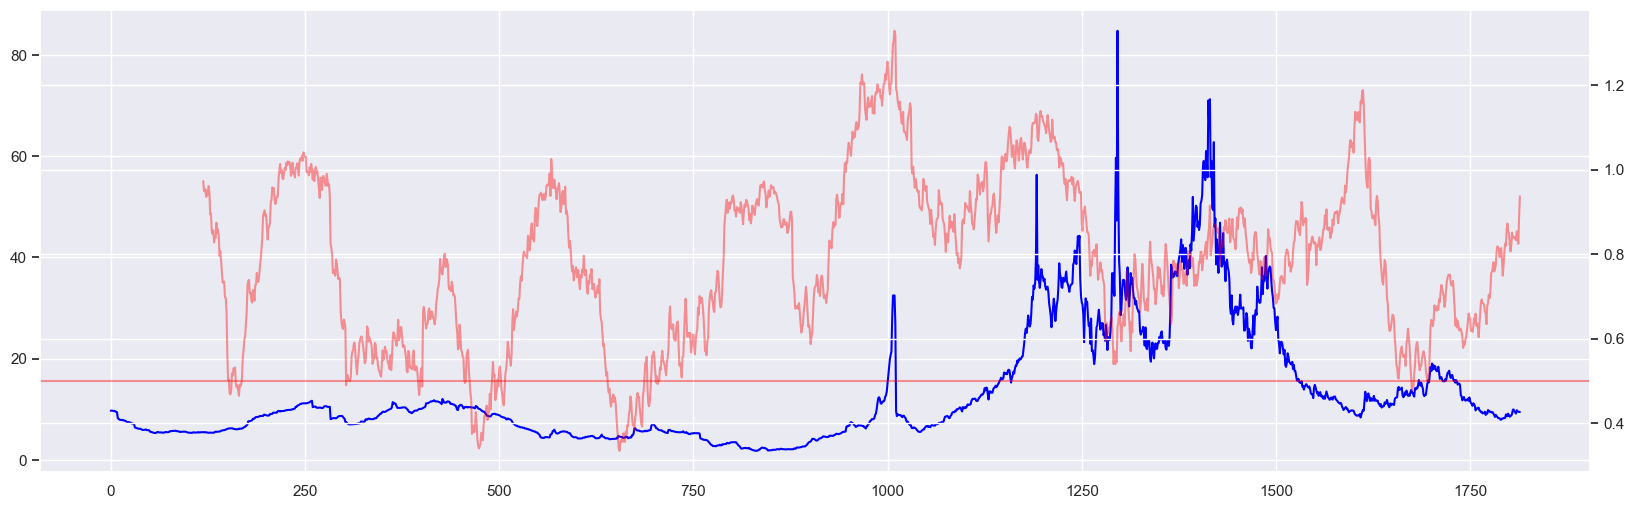

In [103]:
fig,ax = plt.subplots(figsize = (20,6))
ax.plot(price_df['last_price'].values,c = 'blue')
ax2 = ax.twinx()
ax2.plot(hurst_seires.values,c = 'red',alpha = 0.4)
ax2.axhline(y=0.5,c='red',alpha = 0.4)

In [112]:
def displace_distance_ratio(x):
    return (x.iloc[-1] - x.iloc[0]) / x.diff().abs().sum()


In [119]:
price_df['displace_ratio_20'] =  price_df['last_price'].rolling(20).apply(displace_distance_ratio)
price_df['displace_ratio_40'] =  price_df['last_price'].rolling(40).apply(displace_distance_ratio)
price_df['displace_ratio_60'] =  price_df['last_price'].rolling(60).apply(displace_distance_ratio)

/var/folders/y5/y_cp49ps347gtf7m8081bx540000gn/T/ipykernel_31181/2455819478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['displace_ratio_20'] =  price_df['last_price'].rolling(20).apply(displace_distance_ratio)
/var/folders/y5/y_cp49ps347gtf7m8081bx540000gn/T/ipykernel_31181/2455819478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['displace_ratio_40'] =  price_df['last_price'].rolling(40).apply(displace_distance_ratio)
/var/folders/y5/y_cp49ps347gtf7m8081bx540000gn/T/ipykernel

In [117]:
price_df

,last_price,VOLUME,PX_ASK,PX_BID,PX_SETTLE,OPEN_INT,Name,return,return_5d,return_20d,return_90d,return_150d,return_vol_5d,return_vol_20d,return_vol_90d,return_vol_150d,hurst,displace_ratio
Date,,,,,,,,,,,,,,,,,,
2017-01-03,9.750,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,9.750,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,9.750,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,-0.005128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,9.700,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,9.700,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,9.831,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,-0.016580,-0.001575,0.011198,-0.005100,-0.001482,0.001867,0.001553,0.001359,0.001781,0.853871,0.315858
2024-03-26,9.668,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,-0.014998,-0.005615,0.009348,-0.005730,-0.001610,0.001896,0.001586,0.001337,0.001782,0.843039,0.261459
2024-03-27,9.523,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,-0.001470,-0.001221,0.007892,-0.005945,-0.001831,0.001648,0.001614,0.001337,0.001781,0.824435,0.237575


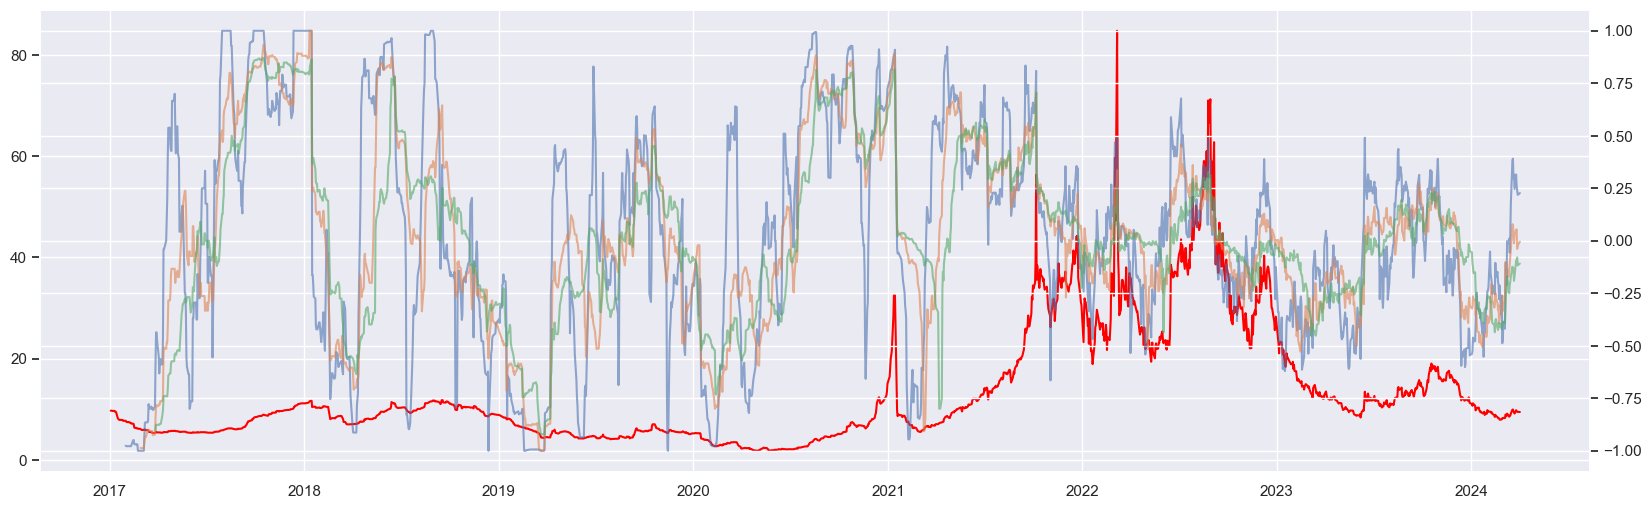

In [123]:
fig,ax = plt.subplots(figsize = (20,6))
ax.plot(price_df['last_price'],c = 'red')
ax2 = ax.twinx()
ax2.plot(price_df['displace_ratio_20'],alpha = 0.6)
ax2.plot(price_df['displace_ratio_40'],alpha = 0.6)
ax2.plot(price_df['displace_ratio_60'],alpha = 0.6)


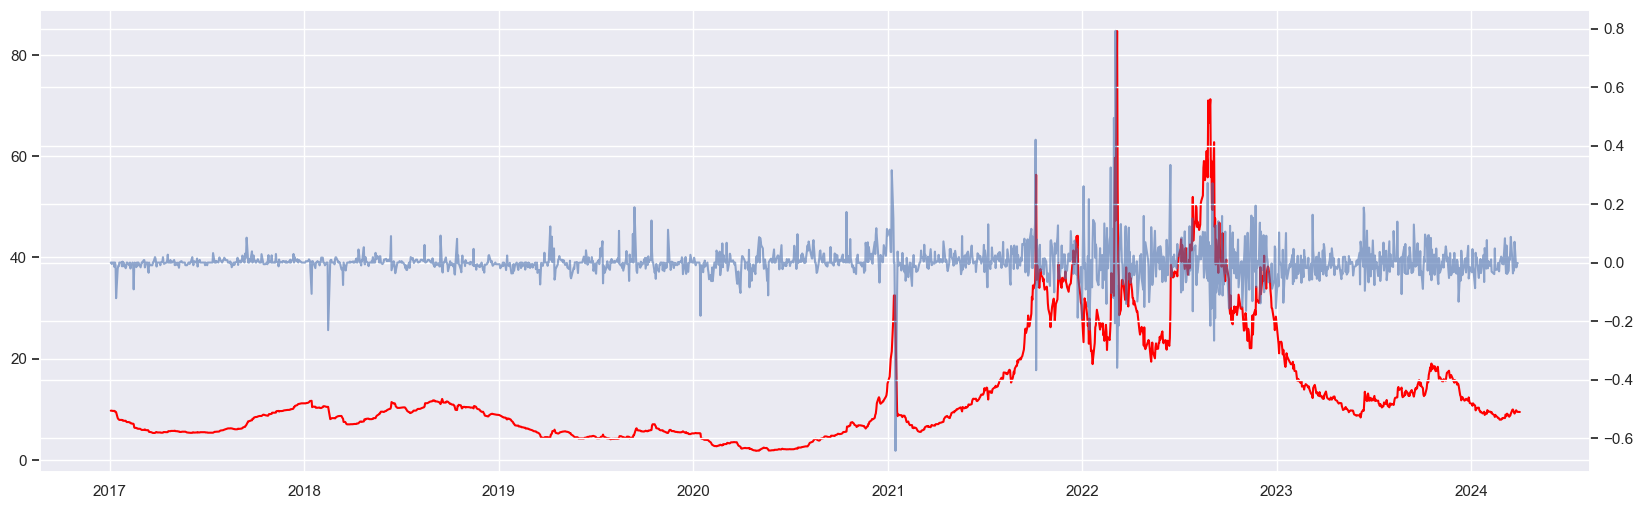

In [148]:
fig,ax = plt.subplots(figsize = (20,6))
ax.plot(price_df['last_price'],c = 'red')
ax2 = ax.twinx()
ax2.plot(price_df['return'],alpha = 0.6)

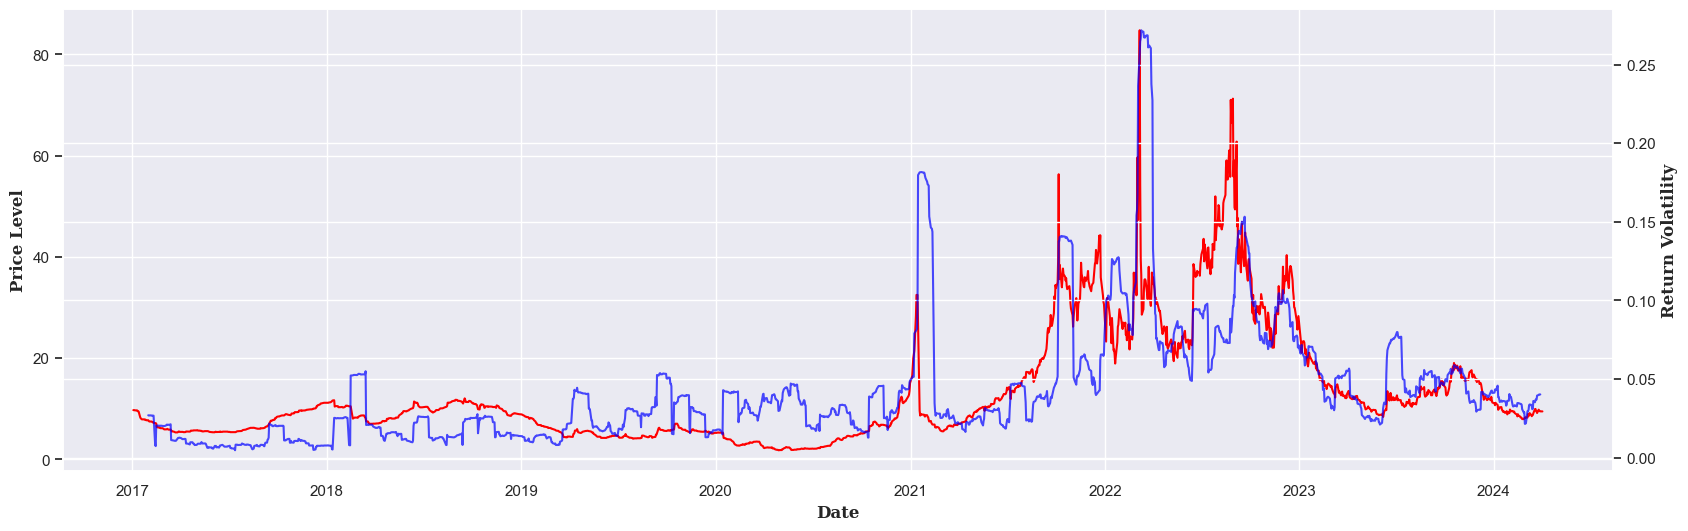

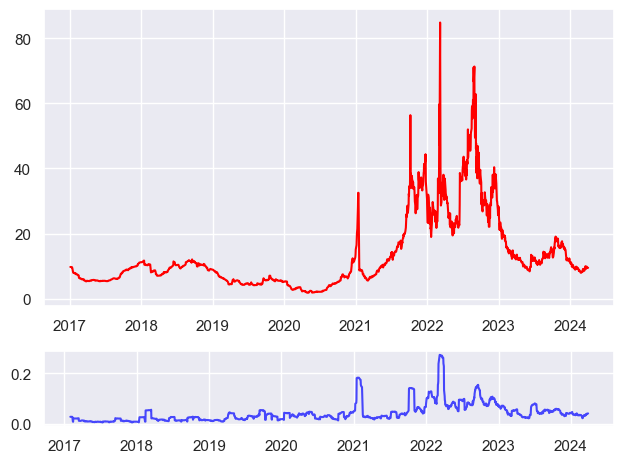

In [182]:
fig,ax = plt.subplots(figsize = (20,6))
ax.plot(price_df['last_price'],c = 'red')
plt.xlabel('Date',{'font':'serif', 'size': 12, 'weight':'bold'})
# ax.set_yticks({'font':'serif', 'size': 12, 'weight':'bold'})
plt.ylabel('Price Level',{'font':'serif', 'size': 12, 'weight':'bold'})
ax2 = ax.twinx()
ax2.plot(price_df['return'].rolling(20).std(),alpha = 0.7,c='blue')
plt.ylabel('Return Volatility',{'font':'serif', 'size': 12, 'weight':'bold'})




f, (a0, a1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]})

a0.plot(price_df['last_price'],c = 'red')
a1.plot(price_df['return'].rolling(20).std(),alpha = 0.7,c='blue')
 

f.tight_layout()


In [291]:
price_df

,last_price,VOLUME,PX_ASK,PX_BID,PX_SETTLE,OPEN_INT,Name,return,return_5d,return_20d,...,hurst_simplify_random_walk,hurst_notsimplify_random_walk,hurst_simplify_price,hurst_notsimplify_price,hurst_simplify_change,hurst_notsimplify_change,mom_5d,mom_20d,mom_90d,mom_150d
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,9.750,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,9.750,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,9.750,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,-0.005128,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,9.700,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,9.700,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,9.831,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,-0.016580,-0.011529,0.208477,...,0.667296,0.728270,0.853871,0.738537,0.220674,1.058123,-0.011529,0.208477,-0.521449,-0.355016
2024-03-26,9.668,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,-0.014998,-0.031862,0.171540,...,0.654955,0.705677,0.843039,0.718939,0.234353,1.066507,-0.031862,0.171540,-0.577540,-0.374228
2024-03-27,9.523,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,-0.001470,-0.009302,0.142406,...,0.634484,0.701639,0.824435,0.712816,0.220175,1.065830,-0.009302,0.142406,-0.596997,-0.407319


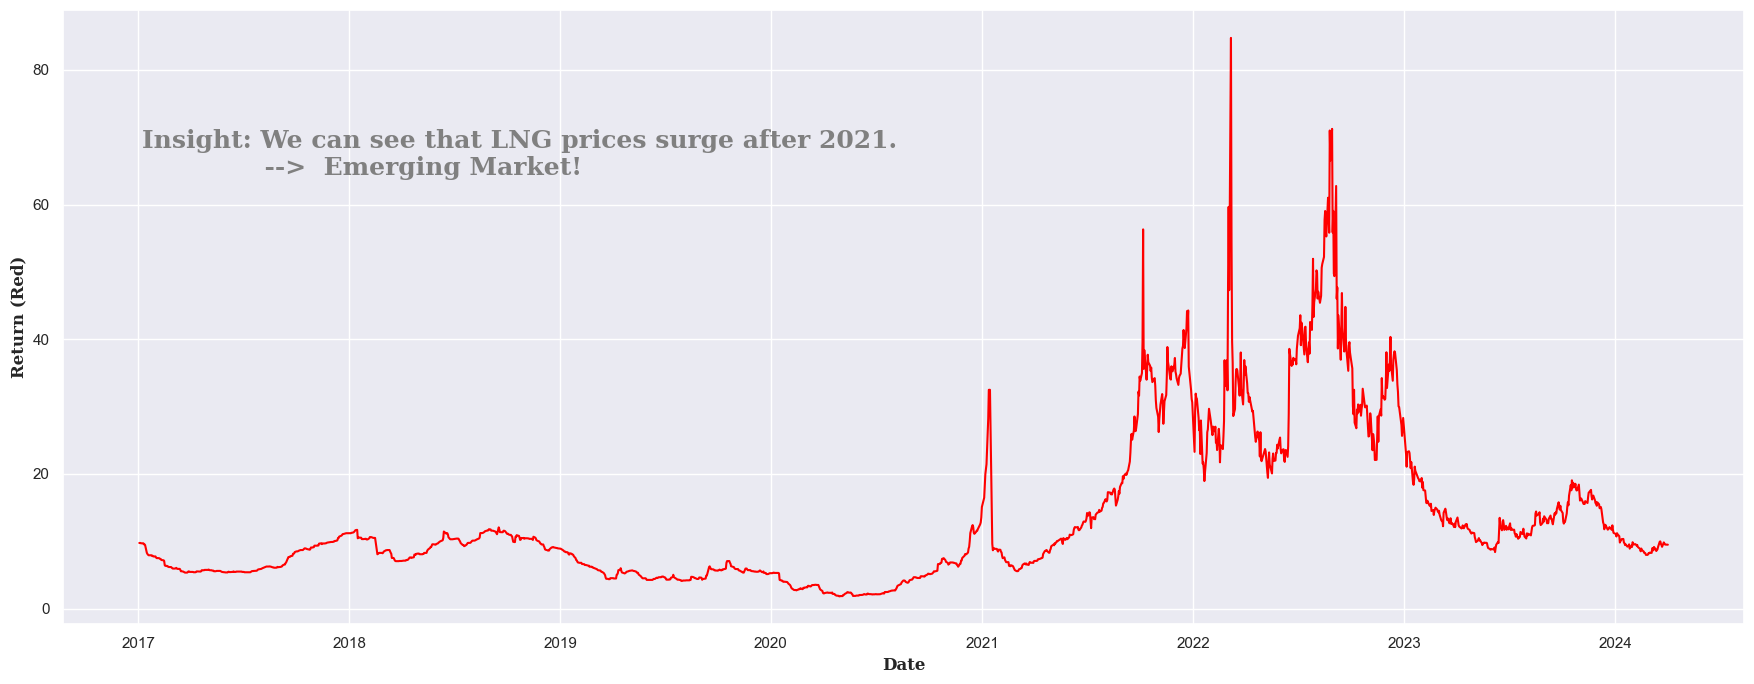

In [331]:

# f, (a0, a1) = plt.subplots(2, 1,figsize = (18,7), gridspec_kw={'height_ratios': [3, 1]})

f, (a0) = plt.subplots(1, 1,figsize = (18,7) )
a0.plot(price_df['last_price'],c = 'red',label = 'Japan Korea Marker Index')

# a0.text(0.3,.38,'Japan Korea Marker Index Characteristics',{'font':'serif','size':18, 'color':'black', 'weight':'bold'},transform=ax.transAxes)
a0.text(-0.05,.27,'Insight: We can see that LNG prices surge after 2021. \n              -->  Emerging Market!',{'font':'serif','size':18, 'color':'grey', 'weight':'bold'},transform=ax.transAxes)
a0.set_ylabel('Price Level',{'font':'serif', 'size': 12, 'weight':'bold'})
# a0.set_facecolor('white')
plt.xlabel('Date',{'font':'serif', 'size': 12, 'weight':'bold'})
# a0.set_xticks([])
# a1.plot(price_df['return'].rolling(20).std(),c='blue',label = 'Volatility')
# plt.ylabel('Volatility (Blue)',{'font':'serif', 'size': 12, 'weight':'bold'})
# a2 = a1.twinx()
# a2.plot(price_df['return'],c='red',alpha = 0.5,label = 'Return')

plt.ylabel('Return (Red)',{'font':'serif', 'size': 12, 'weight':'bold'})

f.savefig('JKM Price.pdf')
f.tight_layout()

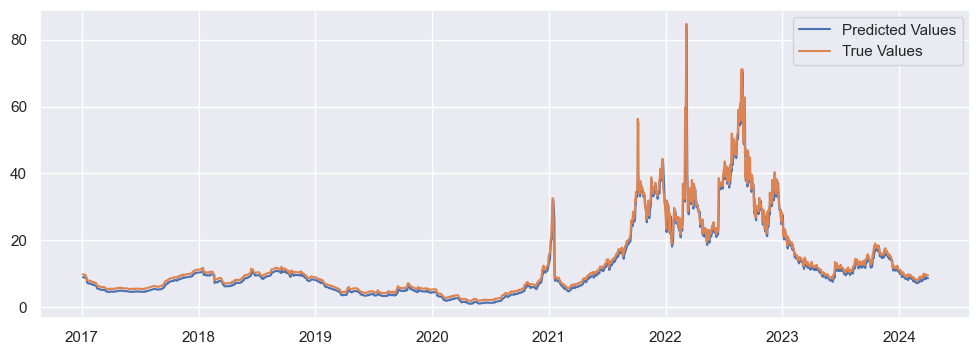

In [358]:
plt.figure(figsize=(12,4))
plt.plot(price_df.index,price_df['last_price'].shift(1).values + np.random.randn(1)*1.52,label = 'Predicted Values')
plt.plot(price_df.index,price_df['last_price'].values,label = 'True Values')
plt.legend()
plt.savefig('deception.pdf')

In [1]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 6.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 6.2 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.8/857.8 kB 4.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.7/240.7 kB 4.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.8 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.11.2
    Uninstalling Pygments-2.11.2:
      Successfully uninstalled Pygments-2.11.2
ERROR: pip's dependency resolver does not currently take into account

In [2]:
streamlit hello

SyntaxError: invalid syntax (2773187961.py, line 1)

In [4]:
import streamlit as st
import pandas as pd
 
st.write("""
# My first app
Hello *world!*
""")
 


In [334]:
np.random.randn(1) 

array([0.45466993])

In [321]:
df_copy.columns 

Index(['last_price', 'VOLUME', 'PX_ASK', 'PX_BID', 'PX_SETTLE', 'OPEN_INT',
       'Name', 'return', 'return_5d', 'return_20d', 'return_90d',
       'return_150d', 'return_vol_5d', 'return_vol_20d', 'return_vol_90d',
       'return_vol_150d', 'hurst', 'displace_ratio', 'displace_ratio_20',
       'displace_ratio_40', 'displace_ratio_60', 'zero_crossings_10',
       'zero_crossings_20', 'zero_crossings_40', 'zero_crossings_60', 'y_n1',
       'y_n5', 'y_n10', 'y_n20', 'y_label_n1', 'y_label_n5', 'y_label_n10',
       'y_label_n20', 'hurst_simplify_random_walk',
       'hurst_notsimplify_random_walk', 'hurst_simplify_price',
       'hurst_notsimplify_price', 'hurst_simplify_change',
       'hurst_notsimplify_change'],
      dtype='object')

In [127]:
def crossings(x,window):
    return ((((x - x.mean()) * (x - x.mean()).shift(1) ) <= 0 ).sum()) / window

In [128]:
for wind in [10,20,40,60]:
    price_df[f'zero_crossings_{wind}'] = price_df['last_price'].rolling(wind).apply(lambda x: crossings(x,window=wind)) 

/var/folders/y5/y_cp49ps347gtf7m8081bx540000gn/T/ipykernel_31181/4125040097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df[f'zero_crossings_{wind}'] = price_df['last_price'].rolling(wind).apply(lambda x: crossings(x,window=wind))
/var/folders/y5/y_cp49ps347gtf7m8081bx540000gn/T/ipykernel_31181/4125040097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df[f'zero_crossings_{wind}'] = price_df['last_price'].rolling(wind).apply(lambda x: crossings(x,window=wind))
/var/folders/y5/y_cp49ps

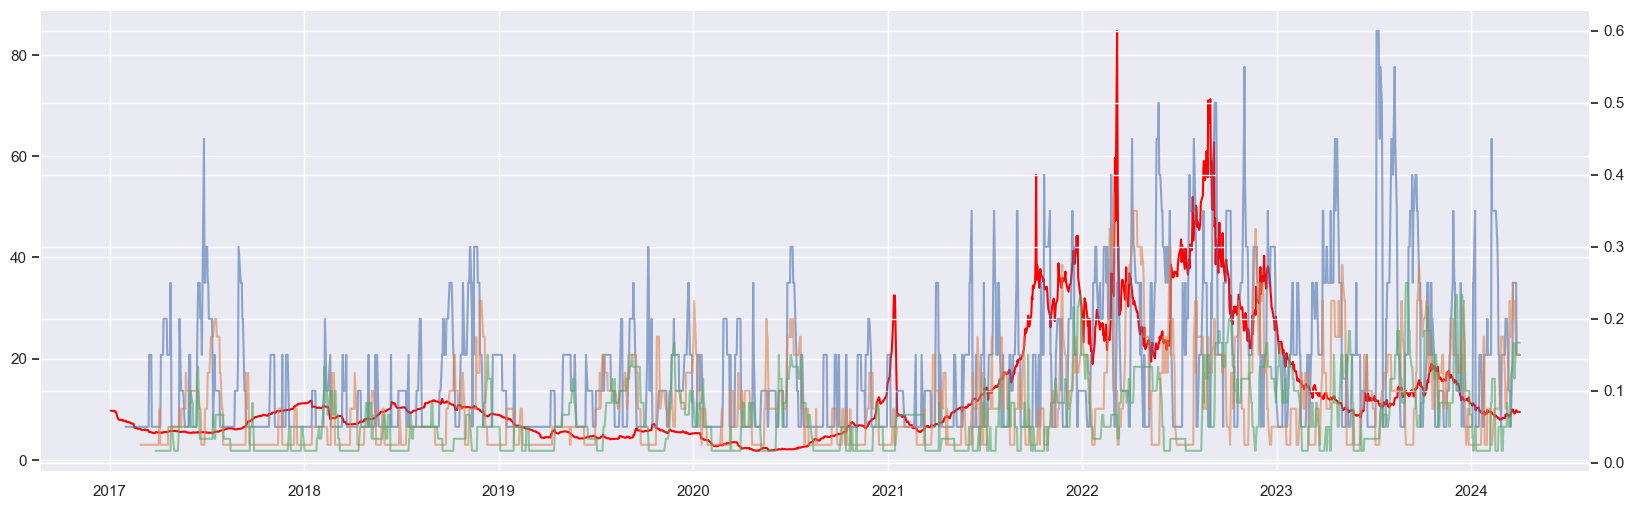

In [130]:
fig,ax = plt.subplots(figsize = (20,6))
ax.plot(price_df['last_price'],c = 'red')
ax2 = ax.twinx()
ax2.plot(price_df['zero_crossings_20'],alpha = 0.6)
ax2.plot(price_df['zero_crossings_40'],alpha = 0.6)
ax2.plot(price_df['zero_crossings_60'],alpha = 0.6)

In [131]:
price_df

,last_price,VOLUME,PX_ASK,PX_BID,PX_SETTLE,OPEN_INT,Name,return,return_5d,return_20d,...,return_vol_150d,hurst,displace_ratio,displace_ratio_20,displace_ratio_40,displace_ratio_60,zero_crossings_10,zero_crossings_20,zero_crossings_40,zero_crossings_60
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,9.750,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,9.750,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,9.750,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,-0.005128,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,9.700,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,9.700,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,9.831,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,-0.016580,-0.001575,0.011198,...,0.001781,0.853871,0.315858,0.315858,0.051255,-0.093511,0.3,0.25,0.15,0.166667
2024-03-26,9.668,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,-0.014998,-0.005615,0.009348,...,0.001782,0.843039,0.261459,0.261459,0.054619,-0.093092,0.3,0.15,0.15,0.166667
2024-03-27,9.523,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,-0.001470,-0.001221,0.007892,...,0.001781,0.824435,0.237575,0.237575,-0.038230,-0.079550,0.3,0.15,0.15,0.166667


/var/folders/y5/y_cp49ps347gtf7m8081bx540000gn/T/ipykernel_31181/4275830697.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


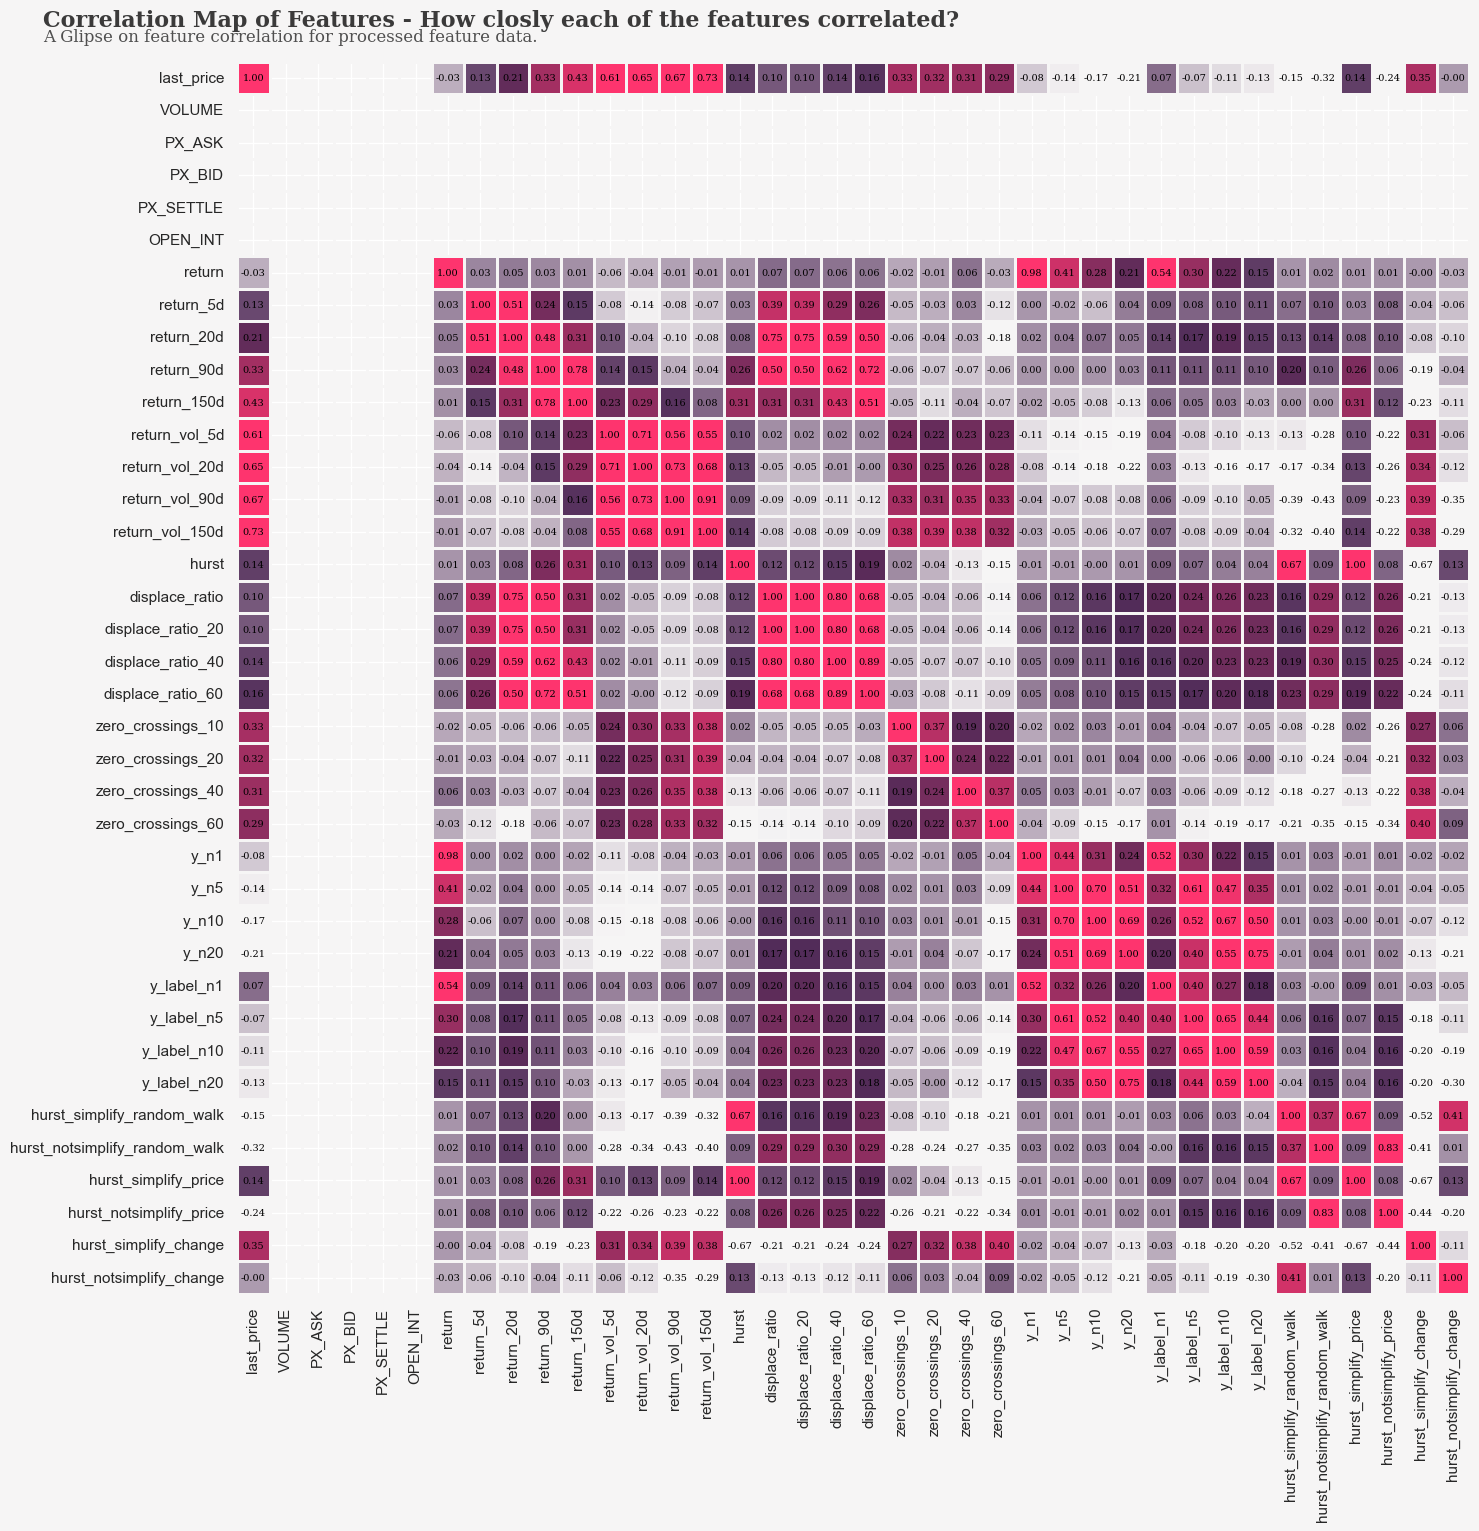

In [276]:
df_copy = price_df.copy()
import matplotlib



# correlation map for all the features
df_corr = df_copy.drop(['Name'],axis=1).corr()
# mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

fig, ax = plt.subplots(figsize = (16,16))
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

# mask = mask[1:, :-1]
corr = df_corr.copy()


colors = ['#f6f5f5','#512b58','#fe346e']

colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors[0:3])

# plot heatmap
sns.heatmap(corr, annot=True, fmt=".2f",cmap = colormap,
           vmin=-0.15, vmax=0.5, cbar_kws={"shrink": .5, }, ax = ax, cbar = False,
           linewidth = 1,linecolor = '#f6f5f5', square = True,annot_kws = {'font':'serif', 'size':7, 'color':'black'} )
# yticks
ax.tick_params(axis = 'y', rotation=0)

# ax.set_xticklabels(list(df_corr.columns), {'font':'serif', 'size':10, 'weight':'bold'})
# ax.set_yticklabels(df_corr.columns, {'font':'serif', 'size':10, 'weight':'bold'})
ax.text(-6,-1.1, 'Correlation Map of Features - How closly each of the features correlated?',{'font':'serif', 'size': 16, 'weight':'bold'}, alpha = 0.9)
ax.text(-6,-0.65, 'A Glipse on feature correlation for processed feature data.',{'font':'serif', 'size': 12, 'weight':'normal'}, alpha = 0.8)



fig.show()

In [139]:
for lag in [1,5,10,20]:
    price_df[f'y_n{lag}'] = np.log(price_df['last_price'].shift(-lag)) - np.log(price_df['last_price']) 
    price_df[f'y_label_n{lag}'] = price_df[f'y_n{lag}'] > 0 


/var/folders/y5/y_cp49ps347gtf7m8081bx540000gn/T/ipykernel_31181/540531323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df[f'y_n{lag}'] = np.log(price_df['last_price'].shift(-lag)) - np.log(price_df['last_price'])
/var/folders/y5/y_cp49ps347gtf7m8081bx540000gn/T/ipykernel_31181/540531323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df[f'y_label_n{lag}'] = price_df[f'y_n{lag}'] > 0
/var/folders/y5/y_cp49ps347gtf7m8081bx540000gn/T/ipykernel_31181/540531323.py:2: SettingWithCopyWarnin

In [137]:
price_df

,last_price,VOLUME,PX_ASK,PX_BID,PX_SETTLE,OPEN_INT,Name,return,return_5d,return_20d,...,displace_ratio_40,displace_ratio_60,zero_crossings_10,zero_crossings_20,zero_crossings_40,zero_crossings_60,y_n1,y_n5,y_n10,y_n20
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,9.750,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-0.005141,-0.182322,-0.249119
2017-01-04,9.750,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-0.020726,-0.194706,-0.262364
2017-01-05,9.750,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,-0.005128,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.005141,-0.020726,-0.207245,-0.262364
2017-01-06,9.700,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-0.026111,-0.202104,-0.257223
2017-01-09,9.700,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-0.155870,-0.202104,-0.263912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,9.831,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,-0.016580,-0.001575,0.011198,...,0.051255,-0.093511,0.3,0.25,0.15,0.166667,-0.016719,NaN,NaN,NaN
2024-03-26,9.668,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,-0.014998,-0.005615,0.009348,...,0.054619,-0.093092,0.3,0.15,0.15,0.166667,-0.015112,NaN,NaN,NaN
2024-03-27,9.523,0.0,NaN,NaN,NaN,NaN,PLLFLNJK PLDP Index,-0.001470,-0.001221,0.007892,...,-0.038230,-0.079550,0.3,0.15,0.15,0.166667,-0.001471,NaN,NaN,NaN


價格走勢圖

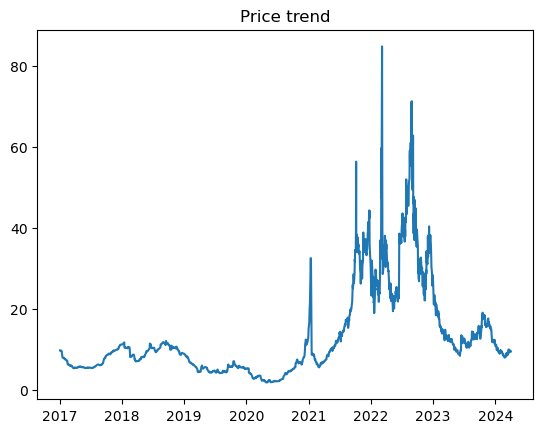

In [210]:
plt.plot(price_df['Date'], price_df['last_price'])
plt.title("Price trend")
plt.show()

收益率

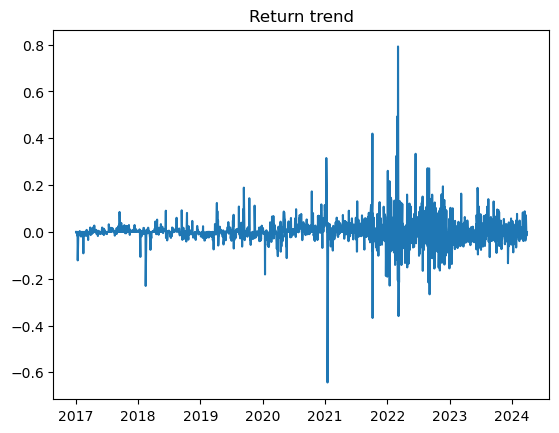

In [211]:
price_df['return'] = price_df['last_price'].shift(-1)/price_df['last_price'] - 1 # 收益率計算
plt.plot(price_df['Date'], price_df['return'])
plt.title('Return trend')
plt.show()

收益率分佈圖，感覺極值挺多

c:\Users\dctp_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


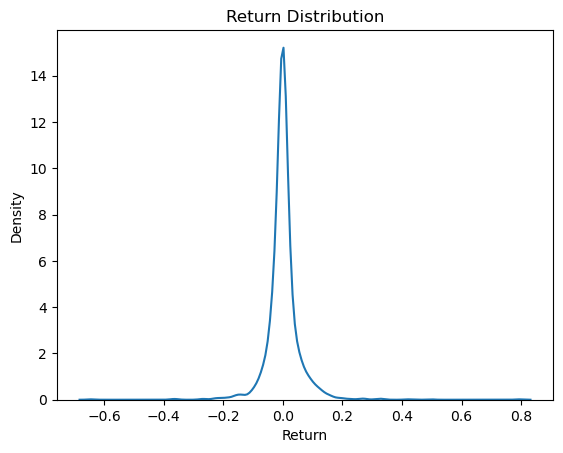

In [212]:
sns.kdeplot(price_df['return'].dropna())
plt.title('Return Distribution')
plt.xlabel('Return')
plt.ylabel('Density')
plt.show()

## 特征1：價格方面的因子

過去5個、20個、90個、150個工作日的收益率均值| 注意不要用到未來數據

In [279]:
price_df['mom_5d'] = price_df['y_n1'].rolling(window=5).sum().shift(1)
price_df['mom_20d'] = price_df['y_n1'].rolling(window=20).sum().shift(1)
price_df['mom_90d'] = price_df['y_n1'].rolling(window=90).sum().shift(1)
price_df['mom_150d'] = price_df['y_n1'].rolling(window=150).sum().shift(1)

/var/folders/y5/y_cp49ps347gtf7m8081bx540000gn/T/ipykernel_31181/2637301891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['mom_5d'] = price_df['y_n1'].rolling(window=5).sum().shift(1)
/var/folders/y5/y_cp49ps347gtf7m8081bx540000gn/T/ipykernel_31181/2637301891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['mom_20d'] = price_df['y_n1'].rolling(window=20).sum().shift(1)
/var/folders/y5/y_cp49ps347gtf7m8081bx540000gn/T/ipykernel_31181/2637301891.py:3: SettingWithCopyWarning: 
A val

In [281]:
price_df.columns

Index(['last_price', 'VOLUME', 'PX_ASK', 'PX_BID', 'PX_SETTLE', 'OPEN_INT',
       'Name', 'return', 'return_5d', 'return_20d', 'return_90d',
       'return_150d', 'return_vol_5d', 'return_vol_20d', 'return_vol_90d',
       'return_vol_150d', 'hurst', 'displace_ratio', 'displace_ratio_20',
       'displace_ratio_40', 'displace_ratio_60', 'zero_crossings_10',
       'zero_crossings_20', 'zero_crossings_40', 'zero_crossings_60', 'y_n1',
       'y_n5', 'y_n10', 'y_n20', 'y_label_n1', 'y_label_n5', 'y_label_n10',
       'y_label_n20', 'hurst_simplify_random_walk',
       'hurst_notsimplify_random_walk', 'hurst_simplify_price',
       'hurst_notsimplify_price', 'hurst_simplify_change',
       'hurst_notsimplify_change', 'mom_5d', 'mom_20d', 'mom_90d', 'mom_150d'],
      dtype='object')

In [287]:
price_df.iloc[:,18:].to_csv('ts_features.csv')

過去5個、20個、90個、150個工作日的收益率波動率

In [141]:
price_df['return_vol_5d'] = price_df['return'].rolling(window=5).std().shift(1)
price_df['return_vol_20d'] = price_df['return'].rolling(window=20).std().shift(1)
price_df['return_vol_90d'] = price_df['return'].rolling(window=90).std().shift(1)
price_df['return_vol_150d'] = price_df['return'].rolling(window=150).std().shift(1)

/var/folders/y5/y_cp49ps347gtf7m8081bx540000gn/T/ipykernel_31181/3195876324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['return_vol_5d'] = price_df['return'].rolling(window=5).std().shift(1)
/var/folders/y5/y_cp49ps347gtf7m8081bx540000gn/T/ipykernel_31181/3195876324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['return_vol_20d'] = price_df['return'].rolling(window=20).std().shift(1)
/var/folders/y5/y_cp49ps347gtf7m8081bx540000gn/T/ipykernel_31181/3195876324.py:3: SettingWithC

## 特征2：Inventories

Daily inventories (by installation)：-zeebrugge代表了不同地理位置的天然气库存水平

比如：Cameron (Liqu.): “Cameron”可能是指Cameron LNG出口终端，位于美国路易斯安那州，而“(Liqu.)”可能表明这列数据是关于液化天然气的

Capacity (Nm3): 这列可能是指某个设施或安装的总存储容量，用立方米（Nm3）来衡量。

Capacity Utilization (%): 这表示已使用的存储容量的百分比。容量利用率可以表明设施多大程度上正在使用其最大存储能力。

Cargo (Nm3): “Cargo”通常指的是货物或商品，这里可能特指储存或运输的天然气量，同样以立方米计量。

Send-in (Nm3): 这表示在特定时间段内送入设施的天然气量。

Send-out (Nm3): 与“Send-in”相对，这表示在特定时间段内从设施送出的天然气量。

In [215]:
inv_by_install = pd.read_excel(".\\FE5225_LNG_ML\\data\\Physical Data\\Daily inventories (by installation).xlsx")
inv_by_install['date'] = pd.to_datetime(inv_by_install.date)
inv_by_insatll = inv_by_install[inv_by_install['date'].isin(testing_dates)]
inv_by_install.head(3)

,date,Level (Nm3),APLNG,Barcelona,Bilbao,Brunsbüttel FSRU,Calcasieu Pass,Cameron (Liqu.),Cartagena (ESP),Corpus Christi,...,South Hook,Swinoujscie,Toscana,Wilhelmshaven GasPort,Zeebrugge,Capacity (Nm3),Capacity Utilization (%),Cargo (Nm3),Send-in (Nm3),Send-out (Nm3)
0,2017-01-01,2603110773,NaN,102282088,120468438,NaN,0.0,0.0,127371257,NaN,...,280546004,115121594,51838806,NaN,22833148,7179061948,36.259762,-57417476,40232660,77140958
1,2017-01-02,2548762422,NaN,170489751,113042583,NaN,0.0,0.0,123435354,NaN,...,271896496,111528291,51827957,NaN,20948277,7179061948,35.502722,9466609,39118068,102077099
2,2017-01-03,2616266042,NaN,165487791,103163141,NaN,0.0,0.0,118848511,NaN,...,256405837,104769935,51811398,NaN,87875187,7179061948,36.443007,166306605,39118068,108952510


In [216]:
inv_by_country = pd.read_excel(".\\FE5225_LNG_ML\\data\\Physical Data\\LNG Daily inventories (by country).xlsx")
inv_by_country['date'] = pd.to_datetime(inv_by_country.date)
inv_by_country = inv_by_country[inv_by_country['date'].isin(testing_dates)]
inv_by_country.head(3)


,date,Level (Nm3),Australia,Belgium,Croatia,France,Germany,Greece,Italy,Lithuania,...,Poland,Portugal,Spain,United Kingdom,United States,Capacity (Nm3),Capacity Utilization (%),Cargo (Nm3),Send-in (Nm3),Send-out (Nm3)
0,2017-01-01,2603110773,NaN,22833148,NaN,155699709,NaN,39972855,121873098,89666985,...,115121594,160749062,662663201,739720793,378498199.0,7179061948,36.259762,-57417476,40232660,77140958
1,2017-01-02,2548762422,NaN,20948277,NaN,146719592,NaN,33499428,113857400,87895743,...,111528291,155055050,693762716,728392153,341182778.0,7179061948,35.502722,9466609,39118068,102077099
2,2017-01-03,2616266042,NaN,87875187,NaN,218393225,NaN,26869547,107283477,77689118,...,104769935,142971548,644387204,710288598,380301417.0,7179061948,36.443007,166306605,39118068,108952510


只用inventories這個數據

In [217]:
inv = pd.read_excel(".\\FE5225_LNG_ML\\data\\Physical Data\\LNG Daily inventories.xlsx")
inv['date'] = pd.to_datetime(inv.date)
inv = inv[inv['date'].isin(testing_dates)]
inv = inv.sort_values(by='date')
inv = inv.set_index('date')
inv.head(3)

,Level (Nm3),Capacity (Nm3),Capacity Utilization (%),Cargo (Nm3),Send-in (Nm3),Send-out (Nm3)
date,,,,,,
2017-01-01,2603110773,7179061948,36.259762,-57417476,40232660,77140958
2017-01-02,2548762422,7179061948,35.502722,9466609,39118068,102077099
2017-01-03,2616266042,7179061948,36.443007,166306605,39118068,108952510


In [218]:
#加入變化率
for col in list(inv.columns)[1:]:
    inv[f'{col}_rate'] = inv[col]/inv[col].shift(1)-1
inv.head(3)

,Level (Nm3),Capacity (Nm3),Capacity Utilization (%),Cargo (Nm3),Send-in (Nm3),Send-out (Nm3),Capacity (Nm3)_rate,Capacity Utilization (%)_rate,Cargo (Nm3)_rate,Send-in (Nm3)_rate,Send-out (Nm3)_rate
date,,,,,,,,,,,
2017-01-01,2603110773,7179061948,36.259762,-57417476,40232660,77140958,NaN,NaN,NaN,NaN,NaN
2017-01-02,2548762422,7179061948,35.502722,9466609,39118068,102077099,0.0,-0.020878,-1.164873,-0.027704,0.323254
2017-01-03,2616266042,7179061948,36.443007,166306605,39118068,108952510,0.0,0.026485,16.567706,0.000000,0.067355


In [219]:
#inv_sin = pd.read_excel(".\\FE5225_LNG_ML\\data\\Physical Data\\LNG Daily inventories-sin-tra23009.xlsx")
#inv_sin['date'] = pd.to_datetime(inv_sin.date)
#inv_sin = inv_sin[inv_sin['date'].isin(testing_dates)]
#inv_sin

#same as above


## 特征3：出口

總出口

In [220]:
exports = pd.read_excel(".\\FE5225_LNG_ML\\data\\Physical Data\\World daily exports — 2024-04-04 15h05.xlsx")
exports['date'] = pd.to_datetime(exports.date)
exports = exports[exports['date'].isin(testing_dates)]
exports = exports.rename(columns={'Total':'total_exports'})

exports = exports.sort_values(by='date')
exports = exports.set_index('date')
# 加入變化率
exports['total_exports_rate'] = exports['total_exports']/exports['total_exports'].shift(1)-1
exports.head(3)


,total_exports,total_exports_rate
date,,
2017-01-01,1556735,NaN
2017-01-02,1857938,0.193484
2017-01-03,1425050,-0.232994


根據國家分類(Taiwan belongs to CN)

In [221]:
exports_by_des = pd.read_excel(".\\FE5225_LNG_ML\\data\\Physical Data\\World daily exports (by destination country) — 2024-04-04 15h07.xlsx")
exports_by_des['date'] = pd.to_datetime(exports_by_des.date)
exports_by_des = exports_by_des[exports_by_des['date'].isin(testing_dates)]
exports_by_des = exports_by_des.sort_values(by='date')
exports_by_des.set_index('date',inplace=True)
exports_by_des.head(3)

,Japan,South Korea,China,India,Spain,Taiwan,France,United Kingdom,Turkey,Italy,...,Gibraltar,Australia,Russian Federation,Denmark,Vietnam,Papua New Guinea,Cuba,Bahrain,Estonia,Iceland
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,707551,413220,0,0,55912,140650,0,0,209714,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-02,373037,253175,403520,131945,267720,0,0,0,294654,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-03,585686,210490,0,280650,0,141329,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
# 只看日本，韓國的數據及變化率
exports_by_des = exports_by_des.iloc[:,:2]
for col in list(exports_by_des.columns):
    exports_by_des[f'{col}_rate'] = exports_by_des[col]/exports_by_des[col].shift(1)-1
exports_by_des.head(3)


,Japan,South Korea,Japan_rate,South Korea_rate
date,,,,
2017-01-01,707551,413220,NaN,NaN
2017-01-02,373037,253175,-0.472777,-0.387312
2017-01-03,585686,210490,0.570048,-0.168599


In [223]:
exports_by_des.columns = ['exports_' + col for col in exports_by_des.columns]

根據地區

In [224]:
exports_by_des_trading = pd.read_excel(".\\FE5225_LNG_ML\\data\\Physical Data\\World daily exports (by destination trading region) — 2024-04-04 15h06.xlsx")
exports_by_des_trading['date'] = pd.to_datetime(exports_by_des_trading.date)
exports_by_des_trading = exports_by_des_trading[exports_by_des_trading['date'].isin(testing_dates)]
exports_by_des_trading = exports_by_des_trading.sort_values(by='date')
exports_by_des_trading.set_index('date',inplace=True)
exports_by_des_trading.head(3)


,Eastern Asia,North West Europe Zone,MED Zone (MED Sea+Black Sea),South-Central Asia,Latin America,South-East Asia,Mideast Gulf,USEC (US East Coast),Other North Africa,Other Middle East,East Coast Canada,USGC (US Gulf Coast),Unknown,Oceania,Northern Russia,Other Southern Europe
date,,,,,,,,,,,,,,,,
2017-01-01,1261421,0,295314,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-01-02,1029732,0,562374,131945,0,0,0,133887,0,0,0,0,0,0,0,0
2017-01-03,937505,0,73235,280650,0,0,0,0,133660,0,0,0,0,0,0,0


In [225]:
# 只看東亞
exports_by_des_trading = exports_by_des_trading.iloc[:,:1]
exports_by_des_trading['Eastern Asia_rate'] = exports_by_des_trading['Eastern Asia']/exports_by_des_trading['Eastern Asia'].shift(1)-1
exports_by_des_trading.columns = ['exports_' + col for col in exports_by_des_trading.columns]
exports_by_des_trading.head(3)

,exports_Eastern Asia,exports_Eastern Asia_rate
date,,
2017-01-01,1261421,NaN
2017-01-02,1029732,-0.183673
2017-01-03,937505,-0.089564


根據路線，這個不用了

In [226]:
exports_by_route = pd.read_excel(".\\FE5225_LNG_ML\\data\\Physical Data\\World daily exports (by route) — 2024-04-04 15h10.xlsx")
exports_by_route['date'] = pd.to_datetime(exports_by_route.date)
exports_by_route = exports_by_route[exports_by_route['date'].isin(testing_dates)]
exports_by_route.head(3)

,date,Other Routes,Via Suez Canal,Via Panama Canal,Via Northern Sea Route,Via Panama Canal and Suez Canal
1310,2017-01-01,1206371,209714,140650,0,0
1311,2017-01-02,1724078,133860,0,0,0
1312,2017-01-03,1425050,0,0,0,0


## 特征4：進口

根據國家分

In [227]:
imports_by_des = pd.read_excel(".\\FE5225_LNG_ML\\data\\Physical Data\\World daily imports (by destination country) — 2024-04-04 15h11.xlsx")
imports_by_des['date'] = pd.to_datetime(imports_by_des.date)
imports_by_des = imports_by_des[imports_by_des['date'].isin(testing_dates)]
imports_by_des = imports_by_des.sort_values(by='date')
imports_by_des.set_index('date', inplace=True)
imports_by_des.head(3)

,Japan,South Korea,China,India,Spain,Taiwan,France,United Kingdom,Turkey,Italy,...,Gibraltar,Australia,Russian Federation,Denmark,Vietnam,Papua New Guinea,Cuba,Bahrain,Estonia,Iceland
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,467765.0,129776,149487.0,0.0,0.0,0.0,0,0.0,121431.0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-02,682954.0,531228,0.0,0.0,141504.0,0.0,142100,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-03,438601.0,419458,304527.0,0.0,0.0,0.0,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [228]:
# 只看日韓, 記錄一下變化率
imports_by_des = imports_by_des.iloc[:,:2]
for col in imports_by_des.columns:
    imports_by_des[f'{col}_rate'] = imports_by_des[col]/imports_by_des[col].shift(1)-1
imports_by_des.columns = ['imports_' + col for col in imports_by_des.columns]
imports_by_des.head(3)

,imports_Japan,imports_South Korea,imports_Japan_rate,imports_South Korea_rate
date,,,,
2017-01-01,467765.0,129776,NaN,NaN
2017-01-02,682954.0,531228,0.460037,3.093423
2017-01-03,438601.0,419458,-0.357788,-0.210399


根據地區

In [229]:
imports_by_des_trading = pd.read_excel(".\\FE5225_LNG_ML\\data\\Physical Data\\World daily imports (by destination trading region) — 2024-04-04 15h12.xlsx")
imports_by_des_trading['date'] = pd.to_datetime(imports_by_des_trading.date)
imports_by_des_trading = imports_by_des_trading[imports_by_des_trading['date'].isin(testing_dates)]
imports_by_des_trading = imports_by_des_trading.sort_values('date').set_index('date')

imports_by_des_trading.head(3)


,Eastern Asia,North West Europe Zone,MED Zone (MED Sea+Black Sea),South-Central Asia,Latin America,South-East Asia,Mideast Gulf,USEC (US East Coast),Other North Africa,Other Middle East,East Coast Canada,USGC (US Gulf Coast),Unknown,Oceania,Northern Russia,Other Southern Europe
date,,,,,,,,,,,,,,,,
2017-01-01,747028,0.0,121431.0,0.0,0,0.0,0.0,131136,0,147726,0,0,0,0,0,0
2017-01-02,1214182,300190.0,141504.0,0.0,263408,0.0,0.0,0,152323,0,0,0,0,0,0,0
2017-01-03,1162586,0.0,0.0,140939.0,0,0.0,0.0,143576,0,0,0,0,0,0,0,0


In [230]:
# 只要東亞
imports_by_des_trading = imports_by_des_trading.iloc[:,:1]
for col in imports_by_des_trading.columns:
    imports_by_des_trading[f"{col}_rate"] = imports_by_des_trading[col]/imports_by_des_trading[col].shift(1)-1
imports_by_des_trading.columns = ['imports_' + col for col in imports_by_des_trading.columns]
imports_by_des_trading.head(3) 

,imports_Eastern Asia,imports_Eastern Asia_rate
date,,
2017-01-01,747028,NaN
2017-01-02,1214182,0.625350
2017-01-03,1162586,-0.042494


港口，不用了

In [231]:
imports_by_origin_port = pd.read_excel(".\\FE5225_LNG_ML\\data\\Physical Data\\World daily imports (by origin port) — 2024-04-04 15h10.xlsx")
imports_by_origin_port['date'] = pd.to_datetime(imports_by_origin_port.date)
imports_by_origin_port = imports_by_origin_port[imports_by_origin_port['date'].isin(testing_dates)]
imports_by_origin_port.head(3)

,date,Ras Laffan,Bintulu,Dampier,Bonny Island,Point Fortin,Gladstone,Sabine Pass Liq.,Arzew,Prigorodnoye,...,Gyeongsangnam,Europoort Light. 3,NFE Altamira FLNG Terminal,Vlissingen,Westpoort,ICO Zeebrugge Terminal,Gibraltar LNG Terminal,Loudden,Viking Line - Stadsgårdsleden,Yangshan
3288,2017-01-01,127989.0,138663.0,129123,131136.0,0.0,0,0.0,121431.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3289,2017-01-02,564315.0,372269.0,131537,448338.0,263408.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3290,2017-01-03,268986.0,0.0,308479,0.0,143576.0,284465,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


路線，不用了

In [232]:
imports_by_route = pd.read_excel(".\\FE5225_LNG_ML\\data\\Physical Data\\World daily imports (by route) — 2024-04-04 15h10.xlsx")
imports_by_route['date'] = pd.to_datetime(imports_by_route.date)
imports_by_route = exports_by_route[imports_by_route['date'].isin(testing_dates)]
imports_by_route.head(3)

C:\Users\dctp_\AppData\Local\Temp\ipykernel_9152\715751825.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  imports_by_route = exports_by_route[imports_by_route['date'].isin(testing_dates)]


,date,Other Routes,Via Suez Canal,Via Panama Canal,Via Northern Sea Route,Via Panama Canal and Suez Canal
1310,2017-01-01,1206371,209714,140650,0,0
1311,2017-01-02,1724078,133860,0,0,0
1312,2017-01-03,1425050,0,0,0,0


按船隻分類，不用了

In [233]:
imports_by_vessel = pd.read_excel(".\\FE5225_LNG_ML\\data\\Physical Data\\World daily imports (by vessel type) — 2024-04-04 15h10.xlsx")
imports_by_vessel['date'] = pd.to_datetime(imports_by_vessel.date)
imports_by_vessel = imports_by_vessel[imports_by_vessel['date'].isin(testing_dates)]
imports_by_vessel.head(3)
imports_by_vessel = imports_by_vessel.set_index('date')

最後計算一下總進口

In [234]:
imports = imports_by_vessel.sum(axis=1)
imports = pd.DataFrame(imports).rename(columns={0:"total_imports"})
imports['total_imports_rate'] = imports['total_imports']/imports['total_imports'].shift(1)-1
imports.head(3)

,total_imports,total_imports_rate
date,,
2017-01-01,1147321.0,NaN
2017-01-02,2071607.0,0.805604
2017-01-03,1447101.0,-0.301460


## 特征5：擁堵情況

“World daily congestion count (load, discharge, by port)” 指的很可能是一个追踪全球各港口日常拥堵情况的指数或报告。

根據港口分類，不用

In [235]:
congestion_by_port = pd.read_excel(".\\FE5225_LNG_ML\\data\\Physical Data\\World daily congestion count (load, discharge, by port) — 2024-04-04 16h46.xlsx")
congestion_by_port['date'] = pd.to_datetime(congestion_by_port.date)
congestion_by_port = congestion_by_port[congestion_by_port['date'].isin(testing_dates)]
congestion_by_port.head(3)


,date,Ras Laffan,Pengerang,Bintulu,Pasir Gudang,Dampier,Geoje,Gibraltar LNG Terminal,Sabine Pass Liq.,Tanjung Bin,...,Teesside,Kollsnes,Gwangyang Anchorage,Shenzhen,Isle of Grain,Cadiz,Chevron Wheatstone,Melaka Anch.,Malta Light.,Sendai
0,2017-01-01,6,2,2,2,4,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2017-01-02,5,7,6,2,4,3,1,2,3,...,0,0,0,0,0,0,0,0,0,0
2,2017-01-03,9,4,6,2,4,3,0,1,3,...,0,0,0,0,0,0,0,0,0,0


根據等待狀態分類，不用

In [236]:
congestion_by_wait = pd.read_excel(".\\FE5225_LNG_ML\\data\\Physical Data\\World daily congestion count (load, discharge, by waiting status) — 2024-04-04 16h45.xlsx")
congestion_by_wait['date'] = pd.to_datetime(congestion_by_wait.date)
congestion_by_wait = congestion_by_wait[congestion_by_wait['date'].isin(testing_dates)]
congestion_by_wait.head(3)
congestion_by_wait.set_index('date',inplace=True)


加一個擁堵sum

In [237]:
congestion = pd.DataFrame(congestion_by_wait.sum(axis=1))
congestion.sort_index(inplace=True)
congestion = congestion.rename(columns={0:'congestion'})
congestion['congestion_rate'] = congestion['congestion']/congestion['congestion'].shift(1)-1
congestion.head(3)

,congestion,congestion_rate
date,,
2017-01-01,54,NaN
2017-01-02,82,0.518519
2017-01-03,91,0.109756


### on water 不知道是啥，不用了

In [238]:
on_water = pd.read_excel(".\\FE5225_LNG_ML\\data\\Physical Data\\Daily Commodities on water (by origin trading region) — 2024-04-04 16h42.xlsx")
on_water['date'] = pd.to_datetime(on_water.date)
on_water = on_water[on_water['date'].isin(testing_dates)]
on_water.head(3)


,date,USGC (US Gulf Coast),Mideast Gulf,Oceania,Western Africa,South-East Asia,Northern Russia,Latin America,MED Zone (MED Sea+Black Sea),Other Middle East,USEC (US East Coast),North West Europe Zone,Eastern Asia,Eastern Africa,Other North Africa,South-Central Asia,USWC (US West Coast),Unknown
0,2018-11-01,3.372102e+06,7.853680e+06,7.955591e+06,3.573100e+06,3.771544e+06,1.863238e+06,1.644161e+06,930820.221840,9.653676e+05,299976.245914,732603.638019,313509.126434,0.0,0.0,0.0,0,0
1,2018-11-02,3.203754e+06,7.720366e+06,7.389215e+06,3.440345e+06,4.009704e+06,1.864771e+06,1.776058e+06,797190.166769,1.106586e+06,299687.475794,583827.185048,313583.577004,0.0,0.0,0.0,0,0
2,2018-11-03,3.342175e+06,8.399524e+06,6.705508e+06,3.182868e+06,4.089332e+06,1.699306e+06,1.643587e+06,394736.511530,1.105020e+06,299398.984023,713148.311933,454207.205828,0.0,0.0,0.0,0,0


## 特征6：船只數

按類型分類，不用

In [239]:
vessel_count = pd.read_excel(".\\FE5225_LNG_ML\\data\\Physical Data\\Daily available vessel count (by vessel type) — 2024-04-04 16h47.xlsx")
vessel_count['date'] = pd.to_datetime(vessel_count.date)
vessel_count = vessel_count[vessel_count['date'].isin(testing_dates)]
vessel_count.head(3)


,date,XL (Upper Conventional),L (Lower Conventional),XS (Pressure Gas),Q-Flex,M (Med Max),Q-Max,S (Small Scale),Unknown
0,2017-01-01,253,142,23,31,15,14,9,3
1,2017-01-02,253,142,23,31,15,14,9,3
2,2017-01-03,253,142,23,31,15,14,9,3


直接用總數

In [240]:
vessel_count = vessel_count.set_index('date')
vessel_count = vessel_count.sort_index()

vessel_sum = pd.DataFrame(vessel_count.sum(axis=1))
vessel_sum = vessel_sum.rename(columns={0:'vessel_count_sum'})
vessel_sum['vessel_count_sum_rate'] = vessel_sum['vessel_count_sum']/vessel_sum['vessel_count_sum'].shift(1)-1
vessel_sum.head(3)

,vessel_count_sum,vessel_count_sum_rate
date,,
2017-01-01,490,NaN
2017-01-02,490,0.0
2017-01-03,490,0.0


In [241]:
#ballast_cap = pd.read_excel(".\\FE5225_LNG_ML\\data\\Physical Data\\World daily expected ballast capacity capacity (by source) — 2024-04-04 16h43.xlsx")
#ballast_cap['date'] = pd.to_datetime(ballast_cap.date)
#ballast_cap
#只有2024-04-04之後的數據，不考慮

船隻容量，直接求和

In [242]:
vessel_cap = pd.read_excel(".\\FE5225_LNG_ML\\data\\Physical Data\\World daily vessel capacity (by current continents) — 2024-04-04 16h51.xlsx")
vessel_cap['date'] = pd.to_datetime(vessel_cap.date)
vessel_cap = vessel_cap[vessel_cap['date'].isin(testing_dates)]
vessel_cap.head(3)


,date,Asia,Europe,Americas,Africa,Oceania,Unknown
0,2018-01-01,40321129,6010982,5185530,8836226,4463625,9839667
1,2018-01-02,42149959,5634216,5011589,8221110,4988305,8651980
2,2018-01-03,39802364,6678046,5389943,7522480,4864205,10572121


求和

In [243]:
vessel_cap = vessel_cap.set_index('date')
vessel_cap = vessel_cap.sort_index()

vessel_cap_sum = pd.DataFrame(vessel_cap.sum(axis=1))
vessel_cap_sum = vessel_cap_sum.rename(columns={0:'vessel_cap_sum'})
vessel_cap_sum['vessel_cap_sum_rate'] = vessel_cap_sum['vessel_cap_sum']/vessel_cap_sum['vessel_cap_sum'].shift(1)-1
vessel_cap_sum.head(3)

,vessel_cap_sum,vessel_cap_sum_rate
date,,
2018-01-01,74657159,NaN
2018-01-02,74657159,0.000000
2018-01-03,74829159,0.002304


## merge所有因子+label

In [244]:
price_df, 
inv, 
exports,exports_by_des,exports_by_des_trading,imports_by_des,imports_by_des_trading,imports,congestion,vessel_sum,vessel_cap_sum

(            total_exports  total_exports_rate
 date                                         
 2017-01-01        1556735                 NaN
 2017-01-02        1857938            0.193484
 2017-01-03        1425050           -0.232994
 2017-01-04        1799383            0.262681
 2017-01-05        2237584            0.243528
 ...                   ...                 ...
 2024-03-28        3458667            0.575869
 2024-03-29        2035783           -0.411397
 2024-03-30        2413977            0.185773
 2024-03-31        3056524            0.266178
 2024-04-01        2213825           -0.275705
 
 [2648 rows x 2 columns],
             exports_Japan  exports_South Korea  exports_Japan_rate  \
 date                                                                 
 2017-01-01         707551               413220                 NaN   
 2017-01-02         373037               253175           -0.472777   
 2017-01-03         585686               210490            0.570048   
 2017-

In [245]:
price_df = price_df.rename(columns={'Date':'date'})
price_df = price_df.set_index('date')
price_df = price_df.iloc[:,7:]
price_df

,return,return_5d,return_20d,return_90d,return_150d,return_vol_5d,return_vol_20d,return_vol_90d,return_vol_150d
date,,,,,,,,,
2017-01-03,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,-0.005128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-03-25,-0.016580,-0.001575,0.011198,-0.005100,-0.001482,0.001867,0.001553,0.001359,0.001781
2024-03-26,-0.014998,-0.005615,0.009348,-0.005730,-0.001610,0.001896,0.001586,0.001337,0.001782
2024-03-27,-0.001470,-0.001221,0.007892,-0.005945,-0.001831,0.001648,0.001614,0.001337,0.001781


In [246]:
from functools import reduce

dfs = [price_df,inv,exports,exports_by_des,exports_by_des_trading,imports_by_des,imports_by_des_trading,imports,congestion,vessel_sum,vessel_cap_sum]

df = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True, how='left'), dfs)
df


,return,return_5d,return_20d,return_90d,return_150d,return_vol_5d,return_vol_20d,return_vol_90d,return_vol_150d,Level (Nm3),...,imports_Eastern Asia,imports_Eastern Asia_rate,total_imports,total_imports_rate,congestion,congestion_rate,vessel_count_sum,vessel_count_sum_rate,vessel_cap_sum,vessel_cap_sum_rate
date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2616266042,...,1162586,-0.042494,1447101.0,-0.301460,91,0.109756,490,0.000000,NaN,NaN
2017-01-04,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2472657829,...,1387831,0.193745,1672421.0,0.155704,91,0.000000,490,0.000000,NaN,NaN
2017-01-05,-0.005128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2463584639,...,1348985,-0.027990,2023559.0,0.209958,96,0.054945,490,0.000000,NaN,NaN
2017-01-06,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2429864234,...,1678614,0.244353,2367920.0,0.170176,98,0.020833,491,0.002041,NaN,NaN
2017-01-09,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2537470326,...,927275,0.042991,1529089.0,0.461454,101,0.052083,491,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-25,-0.016580,-0.001575,0.011198,-0.005100,-0.001482,0.001867,0.001553,0.001359,0.001781,4201802283,...,1170315,1.071394,2651729.0,0.514985,119,0.017094,796,0.000000,117258682.0,0.000000
2024-03-26,-0.014998,-0.005615,0.009348,-0.005730,-0.001610,0.001896,0.001586,0.001337,0.001782,4151696462,...,1663166,0.421127,2955375.0,0.114509,121,0.016807,796,0.000000,117258682.0,0.000000
2024-03-27,-0.001470,-0.001221,0.007892,-0.005945,-0.001831,0.001648,0.001614,0.001337,0.001781,4063066413,...,1832070,0.101556,2914482.0,-0.013837,131,0.082645,796,0.000000,117258682.0,0.000000


df說明：return是預測目標，表示下一天的收益率. _rate是對應因子的變化率

In [247]:
df.to_parquet(".\\training_df.parquet")